[Dataset](https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data?select=EEG_data.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Attention_EEG_data.csv')
demographic = pd.read_csv("demographic_info.csv")
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [2]:
demographic.rename(columns={'subject ID':'SubjectID',
                            ' gender':'gender',
                            ' age':'age'},inplace=True)

In [3]:
df = df.merge(demographic,on='SubjectID')

In [4]:
df.sample(2)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
814,0.0,6.0,8.0,54.0,86.0,264642.0,25581.0,52938.0,17430.0,5711.0,7703.0,39711.0,4725.0,1.0,1.0,25,Han Chinese,M
430,0.0,3.0,40.0,78.0,54.0,505104.0,24108.0,27102.0,7914.0,1132.0,8547.0,7006.0,3311.0,0.0,0.0,25,Han Chinese,M


In [5]:
# df[df['SubjectID']==0]['VideoID'].unique()

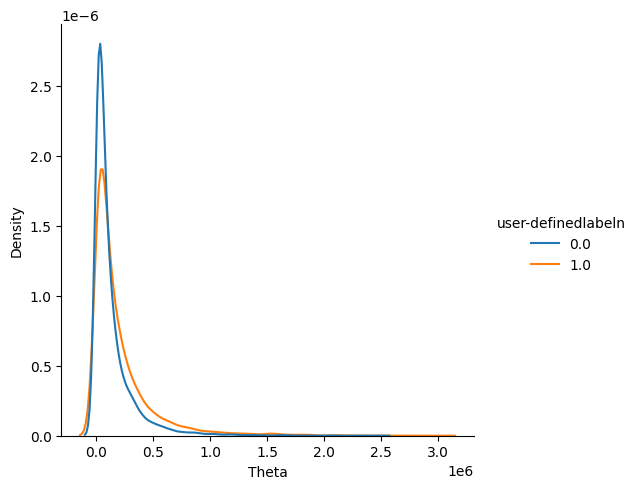

In [6]:
sns.displot(data=df, x='Theta', hue='user-definedlabeln', kind='kde')

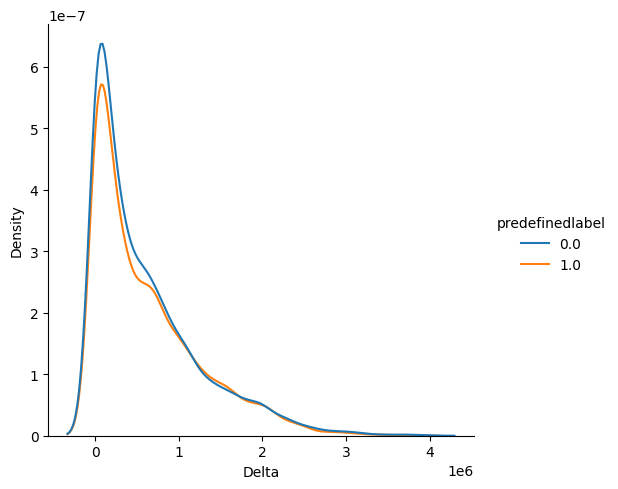

In [7]:
sns.displot(data=df, x='Delta', hue='predefinedlabel', kind='kde')

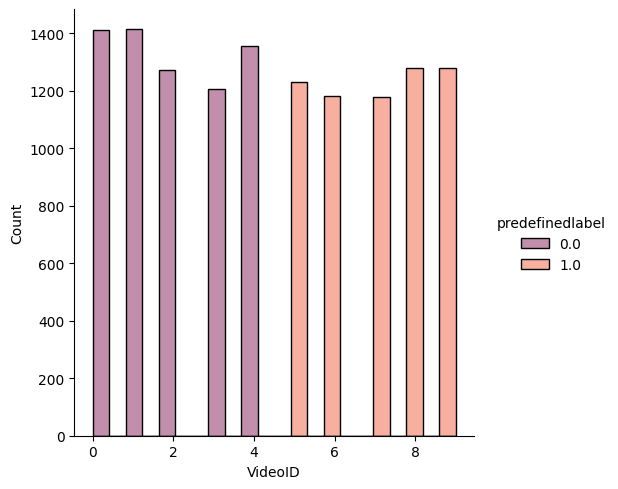

In [8]:
sns.displot(data=df, x='VideoID', hue='predefinedlabel', palette='rocket')

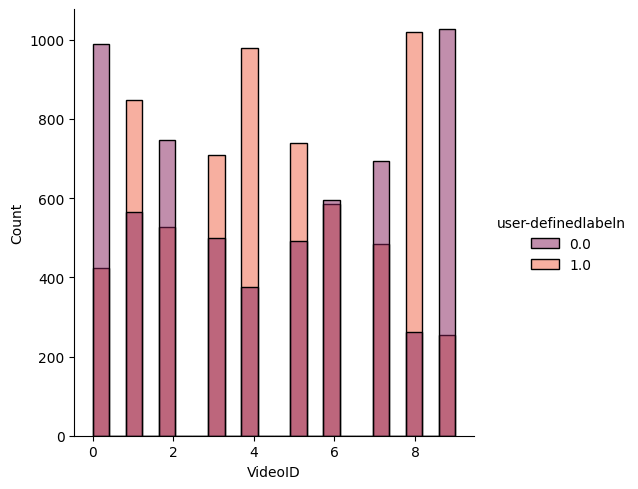

In [9]:
sns.displot(data=df, x='VideoID', hue='user-definedlabeln', palette='rocket')

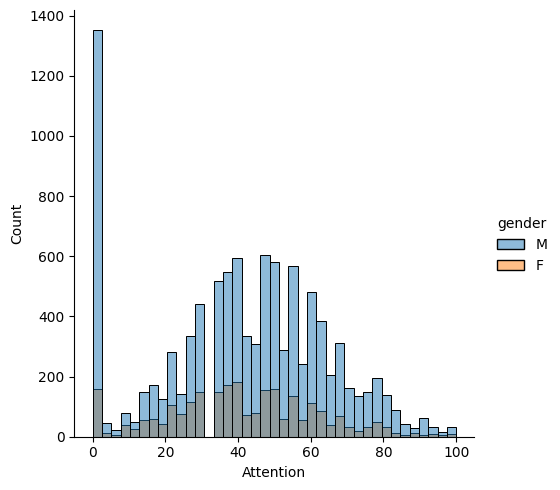

In [10]:
sns.displot(data=df, x='Attention', hue='gender')

<Axes: xlabel='VideoID', ylabel='count'>

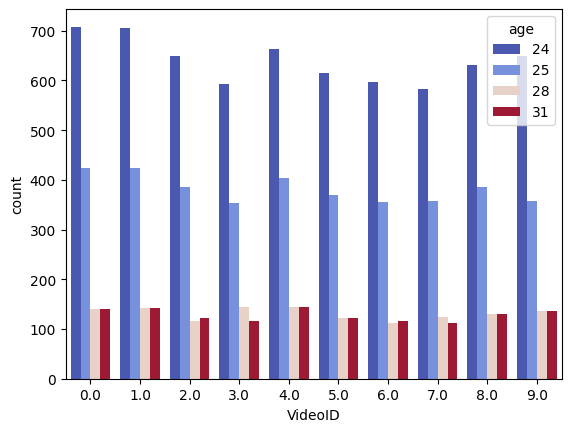

In [5]:
sns.countplot(data=df, x='VideoID', hue='age', palette='coolwarm')

In [6]:
df = df.drop(' ethnicity', axis=1)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [25]:
le.classes_

array(['F', 'M'], dtype=object)

<Axes: >

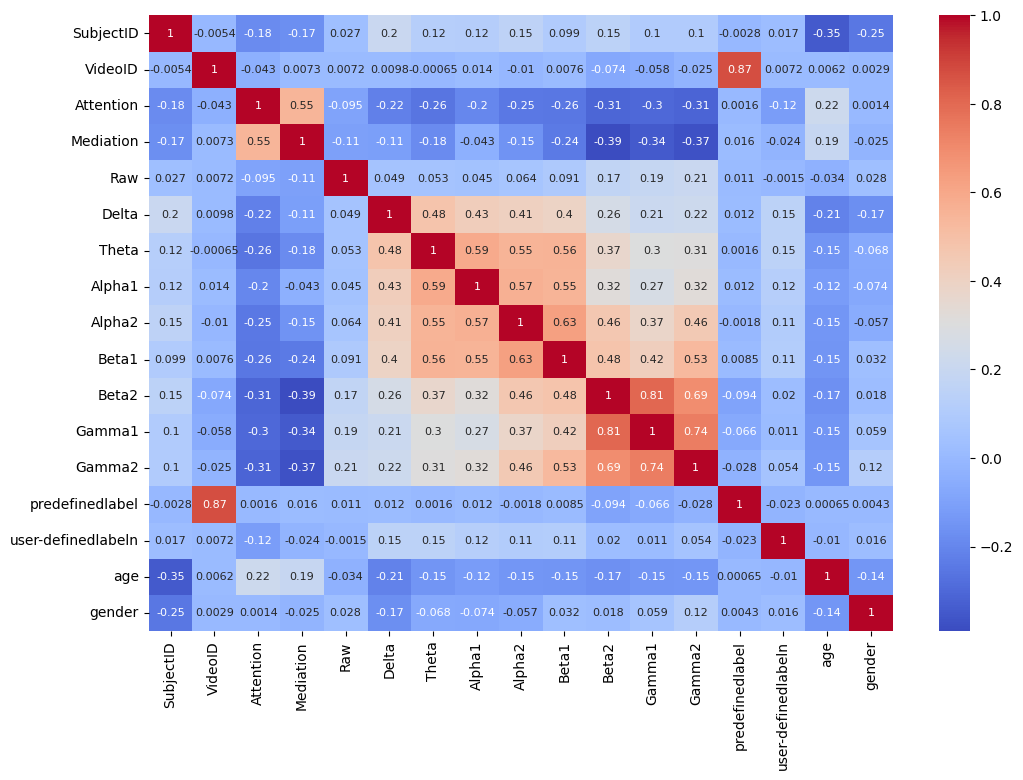

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws = {'size': 8})

In [8]:
# singleStuent = df[df['SubjectID'] == 7]
singleStudent = df

In [9]:
drop_cols = ['SubjectID', 'Raw', 'predefinedlabel']

singleStudent = singleStudent.drop(drop_cols, axis=1)

In [47]:
singleStudent.max()

VideoID                     9.0
Attention                 100.0
Mediation                 100.0
Delta                 3964663.0
Theta                 3007802.0
Alpha1                1369955.0
Alpha2                1016913.0
Beta1                 1067778.0
Beta2                 1645369.0
Gamma1                1972506.0
Gamma2                1348117.0
user-definedlabeln          1.0
age                        31.0
gender                      1.0
dtype: float64

## Classification

In [19]:
from sklearn.model_selection import train_test_split

X = singleStudent.drop('user-definedlabeln', axis=1)
y = singleStudent['user-definedlabeln']


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .8, random_state=42)

In [30]:
X_test.sample(1)

,VideoID,Attention,Mediation,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,gender
4638,5.0,60.0,51.0,284834.0,160209.0,8149.0,23323.0,22667.0,30486.0,8770.0,9037.0,28,0


In [24]:
X_train.columns

Index(['VideoID', 'Attention', 'Mediation', 'Delta', 'Theta', 'Alpha1',
       'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'gender'],
      dtype='object')

In [46]:
X_train.to_csv('db/X_train.csv', index='True')
# y_train.to_csv('db/y_train.csv', index='False')

In [27]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
import pickle

from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Output function
def print_metrics(y_test, y_pred):
    print(classification_report(y_test, y_pred,labels=list(set(y_test)), target_names=['Not-CONFUSED', 'CONFUSED'], digits=3))
    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    # return  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


## Statistical Significance

In [19]:
# from sklearn.feature_selection import chi2
# chi_val, p_val = chi2(X,y)

# p_index = []
# p_val_threshold = []
# alpha = 0.05    # threshold for null hypothesis -> 5%

# for j,k in enumerate(chi_val):
#     p_val_threshold.append(k)
#     p_index.append(X.columns[j])

# p_val_series =  pd.Series(data=p_val_threshold, index=p_index).sort_values()
# print(p_val_series)

# plt.figure(figsize=(7,5))
# ax = p_val_series.plot.barh()
# plt.title(f"Statistical Significance for EEG-Attention", fontsize=16)
# plt.show()

## Classification

In [28]:
# # saving xgboost for deploying

# model = XGBClassifier(max_depth=10)
# model.fit(X_train, y_train)

# # Save the model to a .pkl file
# with open('xgboost_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

In [20]:
classifiers = [
    XGBClassifier(max_depth=10),
    # LogisticRegression(max_iter=1500),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(max_depth=10),
    GradientBoostingClassifier(max_depth=10),
    # AdaBoostClassifier(),
    RandomForestClassifier(max_depth=10)
]

for clf in classifiers:
    print(clf)
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print_metrics(y_test, y_pred)
    
    print("___________________________________________________")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
              precision    recall  f1-score   support

Not-CONFUSED      0.922     0.899     0.910      1298
    CONFUSED      0.899     0.922     0.910      1265

    accuracy                          0.910      2563
   macro avg      0.910   

In [21]:
# from sklearn.metrics import ConfusionMatrixDisplay
# for i in classifiers:
#     i.fit(X_train, y_train)
#     y_pred = i.predict(X_test)
#     print(i)
#     cm = confusion_matrix(y_test, y_pred, normalize='pred')
#     cmd = ConfusionMatrixDisplay(cm)
#     cmd.plot(cmap='rocket', colorbar=True)
#     plt.show()
#     print("_____________________________________________")

# XAI

In [35]:
import shap
def shap_plot(base_model, instance):
    
    model = base_model.fit(X_train, y_train)      # fit model as usual

    explainer = shap.Explainer(model, X_train)   # this is the shap part, it will change according to the models.
    shap_values = explainer(X_test)  # calculating feature importance score

    shap.initjs()           # this is for the plot to work
    print(f"Sample number: {instance}")

    preds = model.predict(X_test)
    probability = model.predict_proba(X_test)

    print(f"Actual class: {y_test.iloc[instance]}")
    print(f"Predicted class: {preds[instance]}")
    print(f"Class 0 Possibility: {probability[instance][0]:.2f}")
    print(f"Class 1 Possibility: {probability[instance][1]:.2f}")

    # print(X_test.iloc[instance])      # to view the values of instance
    # print(shap_values[instance])      # to view the shap scores
    
    plt.grid(False)
    # SHAP Plots
    shap.plots.bar(shap_values, max_display=20, order=shap_values.abs.mean(0))
    shap.plots.beeswarm(shap_values, max_display=20)
    shap.plots.bar(shap_values[instance], max_display=20)
    shap.plots.waterfall(shap_values[instance], max_display=20)
    # shap.dependence_plot(2, shap_values, X_test)

    # force plot
    return shap.plots.force(shap_values[instance])

In [23]:
# print(f"data: {shap_values.data[0]}, \n\n Base: {shap_values.base_values[0]}, \n\n values: {shap_values.values[0]}")

 97%|=================== | 2492/2563 [00:15<00:00]       

Sample number: 1178
Actual class: 0.0
Predicted class: 0
Class 0 Possibility: 0.99
Class 1 Possibility: 0.01


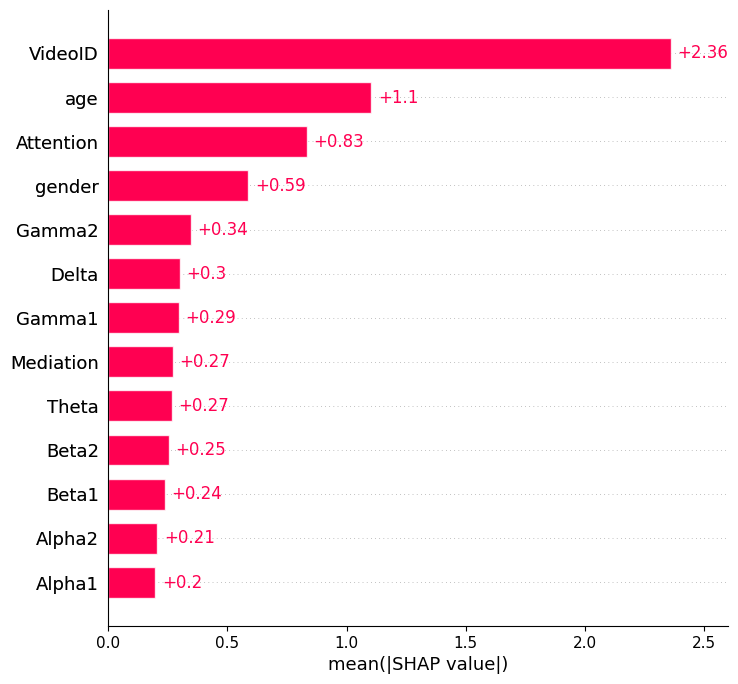

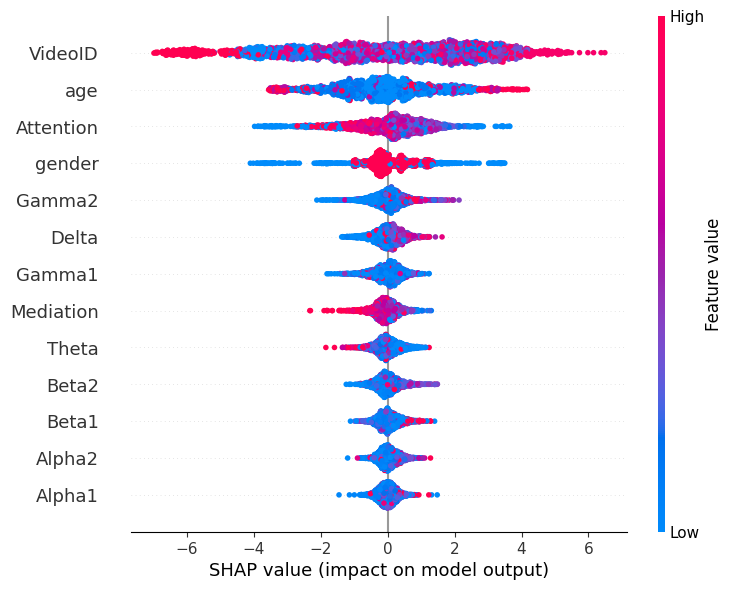

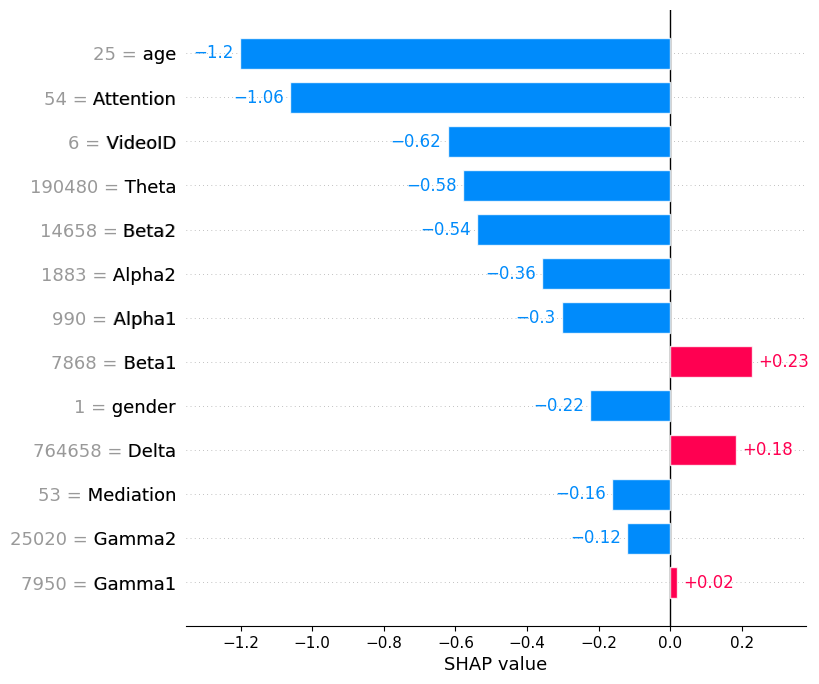

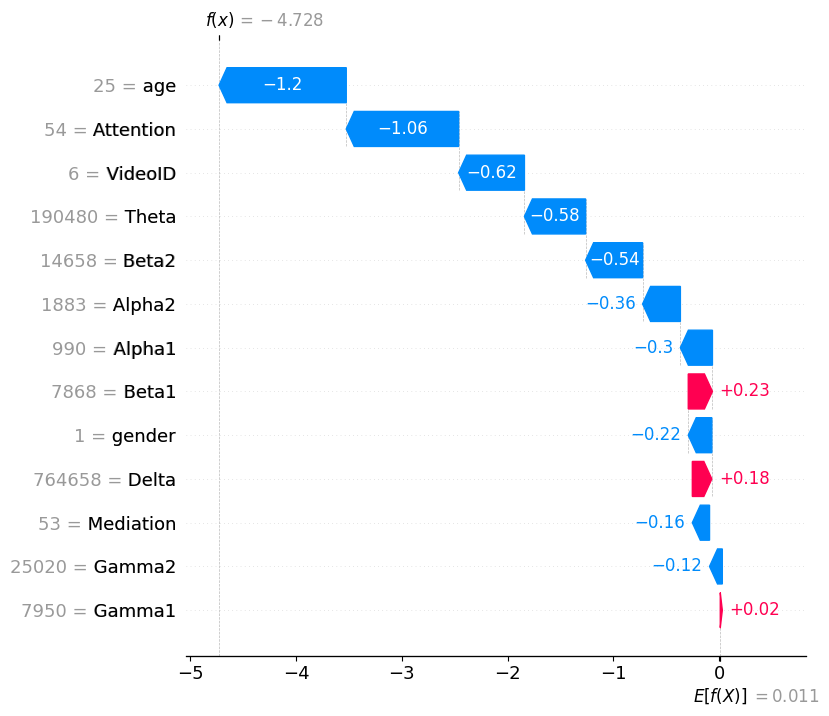

In [36]:
sampleNumber = np.random.randint(0, X_test.shape[0])

shap_plot(XGBClassifier(max_depth=10), sampleNumber)

## LIME

In [38]:
X_test.values[sampleNumber]

array([6.00000e+00, 5.40000e+01, 5.30000e+01, 7.64658e+05, 1.90480e+05,
       9.90000e+02, 1.88300e+03, 7.86800e+03, 1.46580e+04, 7.95000e+03,
       2.50200e+04, 2.50000e+01, 1.00000e+00])

In [44]:
example_input = np.array([[5.0,	60.0, 51.0, 284834.0, 160209.0, 8149.0, 23323.0, 22667.0, 30486.0, 8770.0, 9037.0, 28, 0]])
example_input[0]

array([5.00000e+00, 6.00000e+01, 5.10000e+01, 2.84834e+05, 1.60209e+05,
       8.14900e+03, 2.33230e+04, 2.26670e+04, 3.04860e+04, 8.77000e+03,
       9.03700e+03, 2.80000e+01, 0.00000e+00])

In [37]:
m = XGBClassifier(max_depth=10)
m.fit(X_train, y_train)

import lime
from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['Not-Confused','Confused'], 
                                                  verbose=True, 
                                                  mode='classification')

# Choose the jth instance and use it to predict the results for that selection
# j = np.random.randint(0, X_test.shape[0])
print(f"Sample No: {sampleNumber}") 
exp = explainer.explain_instance(X_test.values[sampleNumber], m.predict_proba, num_features=10)

exp.show_in_notebook(show_table=True)

Sample No: 1178
Intercept 0.58697355498599
Prediction_local [0.64553272]
Right: 0.008764697


In [45]:
import streamlit as st
st.markdown(exp.as_html(), unsafe_allow_html=True)

2024-08-20 15:50:46.396 
  command:

    streamlit run c:\Users\niloy\miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

# LSTM

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional, BatchNormalization,PReLU,ReLU,Reshape

In [27]:
X_train = np.array(X_train).reshape(-1,X_train.shape[1],1)
X_test = np.array(X_test).reshape(-1,X_test.shape[1],1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10248, 13, 1), (2563, 13, 1), (10248,), (2563,))

In [28]:
inputs = tf.keras.Input(shape=(X_train.shape[1],1))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

Dense2 = Dense(128, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense1)
Dense3 = Dense(256, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense2)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

#Dense_1 = Dense(256, activation = 'relu')(flat)

Dense_4 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_4)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13, 1)]           0         
                                                                 
 dense (Dense)               (None, 13, 64)            128       
                                                                 
 bidirectional (Bidirectiona  (None, 13, 512)          657408    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 13, 256)          656384    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 13, 256)           0     

In [29]:
epoch = 100

model.compile(optimizer=keras.optimizers.Adam(learning_rate=3e-4),
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])


history = model.fit(
    X_train,y_train,
    batch_size=20,
    epochs=epoch,
    validation_data=(X_test,y_test),
)

Epoch 1/100
513/513 [==============================] - 21s 22ms/step - loss: 0.7048 - accuracy: 0.5427 - val_loss: 0.6803 - val_accuracy: 0.5884
Epoch 2/100
513/513 [==============================] - 10s 19ms/step - loss: 0.6847 - accuracy: 0.5723 - val_loss: 0.6703 - val_accuracy: 0.6040
Epoch 3/100
513/513 [==============================] - 9s 18ms/step - loss: 0.6740 - accuracy: 0.5873 - val_loss: 0.6650 - val_accuracy: 0.5884
Epoch 4/100
513/513 [==============================] - 10s 20ms/step - loss: 0.6598 - accuracy: 0.6141 - val_loss: 0.6501 - val_accuracy: 0.6063
Epoch 5/100
513/513 [==============================] - 10s 20ms/step - loss: 0.6343 - accuracy: 0.6425 - val_loss: 0.6173 - val_accuracy: 0.6414
Epoch 6/100
513/513 [==============================] - 10s 20ms/step - loss: 0.5918 - accuracy: 0.6833 - val_loss: 0.5769 - val_accuracy: 0.6879
Epoch 7/100
513/513 [==============================] - 10s 20ms/step - loss: 0.5617 - accuracy: 0.7014 - val_loss: 0.5617 - val_acc

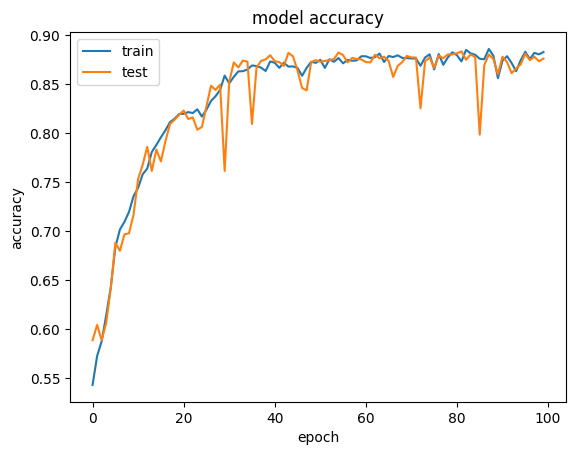

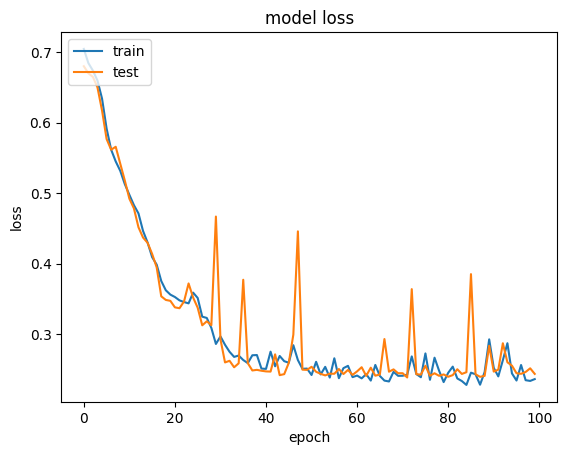

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
print_metrics(y_test, y_pred)

81/81 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

Not-CONFUSED      0.865     0.895     0.880      1298
    CONFUSED      0.888     0.856     0.872      1265

    accuracy                          0.876      2563
   macro avg      0.877     0.876     0.876      2563
weighted avg      0.876     0.876     0.876      2563

ROC_AUC Score: 0.8757


In [33]:
# model.save('BiLSTM-EEG.h5')